In [1]:
#import mysklearn.mypytable
#from mypytable import MyPyTable
from mysklearn.mypytable import MyPyTable
import matplotlib.pyplot as plt
import random

In [2]:
# Define the discretization function
def plot_frequency_diagram(categories, labels, title):
    """Plot a frequency diagram (bar chart) for the categories."""
    unique_categories = sorted(set(categories))  # Find the unique categories in sorted order
    frequencies = [categories.count(cat) for cat in unique_categories]  # Count the occurrences of each category

    plt.bar(labels, frequencies, color='pink')  # Create a bar chart with the labels and frequencies
    plt.title(title)  # Set the title of the chart
    plt.xlabel('Category')  # Label the x-axis
    plt.ylabel('Frequency')  # Label the y-axis
    plt.show()  # Display the chart
def plot_scatterplots(data, attribute_pairs):
    plt.figure(figsize=(15, 10))
    for i, (x_attr, y_attr) in enumerate(attribute_pairs):
        plt.subplot(2, 2, i + 1)
        plt.scatter(data.get_column(x_attr), data.get_column(y_attr), alpha=0.5, color="pink")
        plt.title(f'Scatter Plot of {x_attr} vs {y_attr}')
        plt.xlabel(x_attr)
        plt.ylabel(y_attr)
    plt.tight_layout()
    plt.show()
def discretize_pss_score(table, column_name="PSS_score"):
    """Discretizes the PSS_score column into categories: low, medium, high.

    Args:
        table (MyPyTable): The table containing the PSS_score column.
        column_name (str): Name of the column to discretize. Default is "PSS_score".

    Notes:
        - Assumes the column contains numeric data.
    """
    col_index = table.column_names.index(column_name)

    for row in table.data:
        if isinstance(row[col_index], (int, float)):
            if row[col_index] < 20:
                row[col_index] = "low"
            elif row[col_index] < 27:
                row[col_index] = "moderate"
            else:
                row[col_index] = "high"
def discretize_sleep_time(table, column_name="sleep_time"):
    """Discretizes the PSS_score column into categories: low, medium, high.

    Args:
        table (MyPyTable): The table containing the PSS_score column.
        column_name (str): Name of the column to discretize. Default is "PSS_score".

    Notes:
        - Assumes the column contains numeric data.
    """
    col_index = table.column_names.index(column_name)

    for row in table.data:
        if isinstance(row[col_index], (int, float)):
            if row[col_index] < 6:
                row[col_index] = "horrible"
            elif row[col_index] < 7:
                row[col_index] = "low"
            elif row[col_index] < 8:
                row[col_index] = "medium"
            else:
                row[col_index] = "high"
def discretize_num_sms(table, column_name="num_sms"):
    """Discretizes the PSS_score column into categories: low, medium, high.

    Args:
        table (MyPyTable): The table containing the PSS_score column.
        column_name (str): Name of the column to discretize. Default is "PSS_score".

    Notes:
        - Assumes the column contains numeric data.
    """
    col_index = table.column_names.index(column_name)

    for row in table.data:
        if isinstance(row[col_index], (int, float)):
            if row[col_index] < 17:
                row[col_index] = "low"
            elif row[col_index] < 34:
                row[col_index] = "moderate"
            else:
                row[col_index] = "high"
def discretize_num_calls(table, column_name="num_calls"):
    """Discretizes the PSS_score column into categories: low, medium, high.

    Args:
        table (MyPyTable): The table containing the PSS_score column.
        column_name (str): Name of the column to discretize. Default is "PSS_score".

    Notes:
        - Assumes the column contains numeric data.
    """
    col_index = table.column_names.index(column_name)

    for row in table.data:
        if isinstance(row[col_index], (int, float)):
            if row[col_index] < 7:
                row[col_index] = "low"
            elif row[col_index] < 14:
                row[col_index] = "moderate"
            else:
                row[col_index] = "high"
def discretize_screen_on_time(table, column_name="screen_on_time"):
    """Discretizes the PSS_score column into categories: low, medium, high.

    Args:
        table (MyPyTable): The table containing the PSS_score column.
        column_name (str): Name of the column to discretize. Default is "PSS_score".

    Notes:
        - Assumes the column contains numeric data.
    """
    col_index = table.column_names.index(column_name)

    for row in table.data:
        if isinstance(row[col_index], (int, float)):
            if row[col_index] < 4:
                row[col_index] = "low"
            elif row[col_index] < 8:
                row[col_index] = "moderate"
            else:
                row[col_index] = "high"
def round_columns_to_three_decimals(mypytable):
    """
    Rounds float values in specific columns to three decimal points in place.
    
    Parameters:
        mypytable (MyPyTable): The table containing the data.
    
    Returns:
        None: Modifies the table in place.
    """
    # Columns to round
    columns_to_round = ["screen_on_time", "sleep_duration", "wake_time", "sleep_time"]
    
    for column_name in columns_to_round:
        try:
            # Get the column index
            col_index = mypytable.column_names.index(column_name)
            
            # Modify each row's value in place
            for row in mypytable.data:
                if isinstance(row[col_index], (int, float)):
                    row[col_index] = round(float(row[col_index]), 3)
        except ValueError:
            print(f"Warning: Column '{column_name}' not found in the table.")



In [3]:
myTable = MyPyTable().load_from_file("stress_detection.csv")
discretize_pss_score(myTable)
discretize_num_calls(myTable)
discretize_num_sms(myTable)
discretize_screen_on_time(myTable)
discretize_sleep_time(myTable)
myTable.save_to_file("cleaned_data.csv")
myTable2 = MyPyTable().load_from_file("stress_detection.csv")

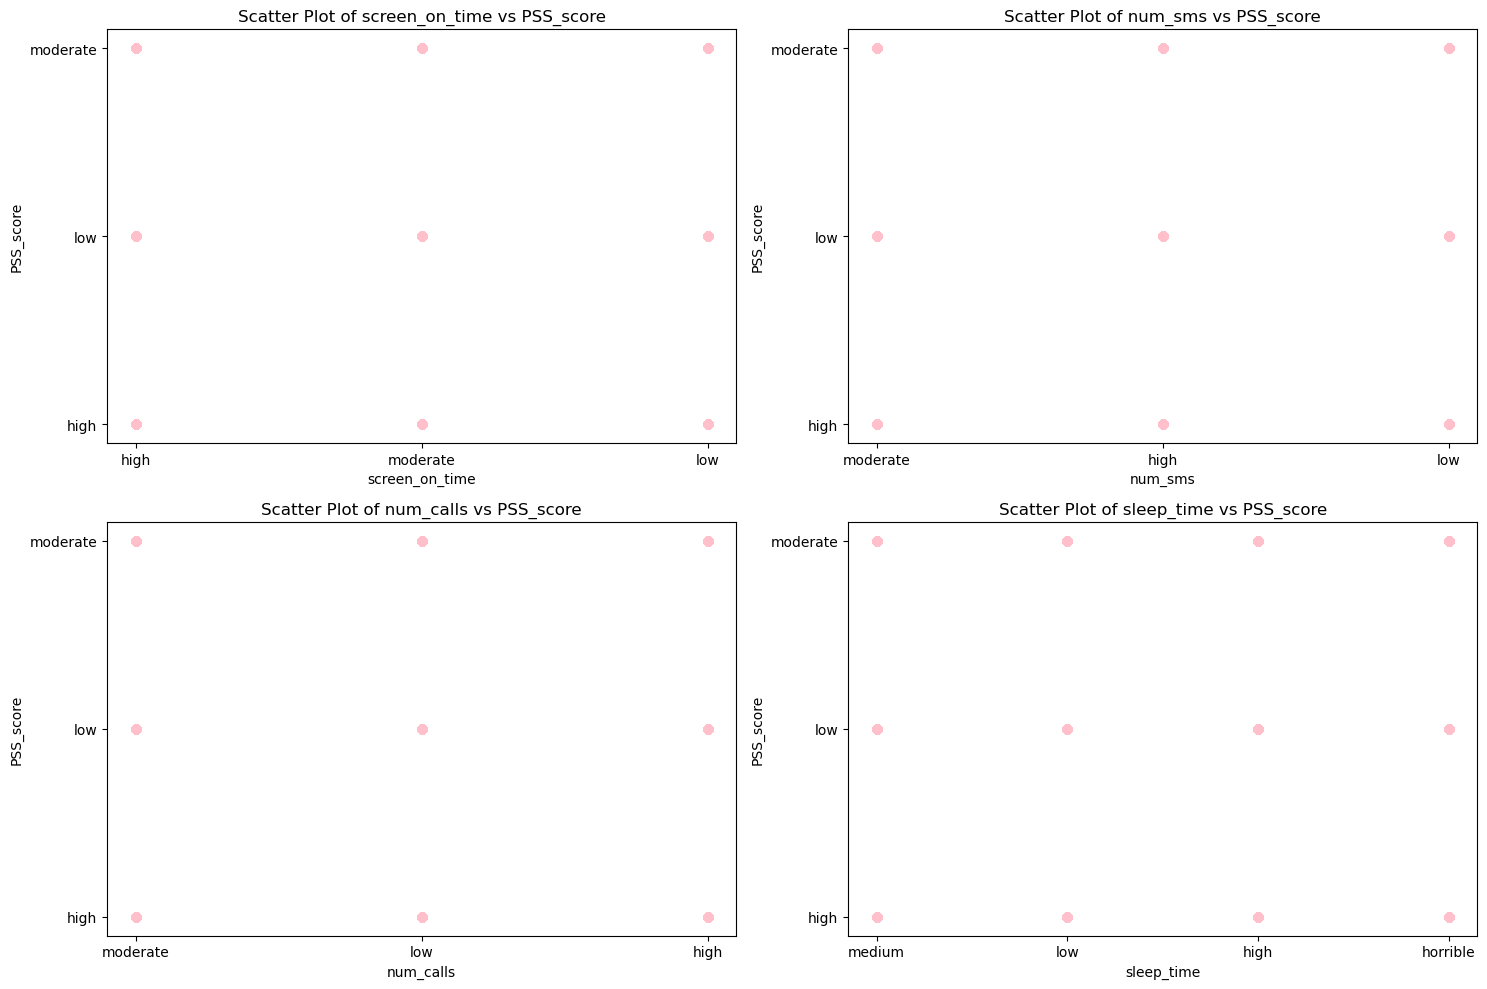

In [ ]:
# Define pairs of attributes for scatter plots
#scatter_pairs = [('PSS_score', 'screen_on_time'), ('PSS_score', 'sleep_duration'), ('PSS_score', 'wake_time'), ('PSS_score', 'sleep_time')]
scatter_pairs = [('screen_on_time', 'PSS_score'), ('num_sms', 'PSS_score'), ('num_calls', 'PSS_score'), ('sleep_time', 'PSS_score')]
# Plot scatter plots for the selected pairs
plot_scatterplots(myTable, scatter_pairs)

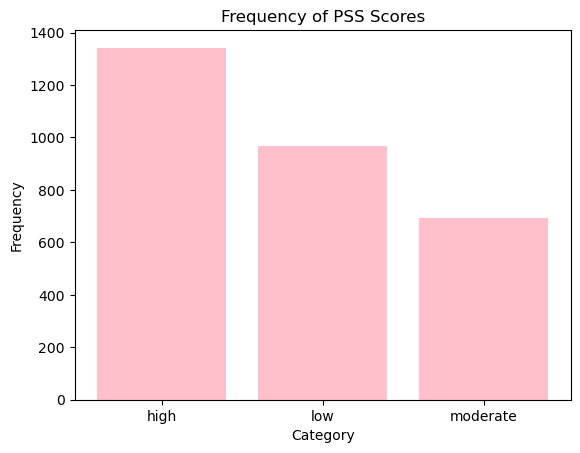

In [ ]:
# Read and process the CSV file
with open("cleaned_data.csv") as file: 
    data = [line.strip().split(",") for line in file.readlines()]
    
# Extract the header and data rows
header = data[0]
rows = data[1:]

# Get the index of the PSS_score column
pss_score_index = header.index("PSS_score")

# Extract the PSS_score values
pss_scores = [row[pss_score_index] for row in rows]

# Define labels for the bar chart
labels = ["high", "low", "moderate"]

# Call the function
plot_frequency_diagram(pss_scores, labels, "Frequency of PSS Scores")
#Pull 650 of each classification to use for random forest classifer

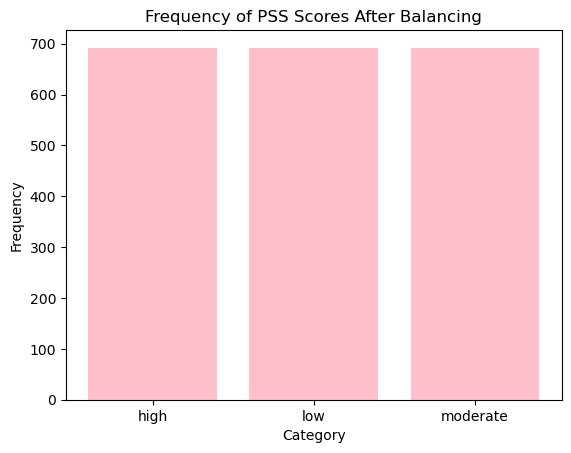

In [ ]:
stress_data = MyPyTable()
stress_data.load_from_file("cleaned_data.csv")

# delete 700 high
# delete 300 low

rows_with_high = [row for row in stress_data.data if row[2] == "high"]
rows_to_drop = random.sample(rows_with_high, k=650)
stress_data.data = [row for row in stress_data.data if row not in rows_to_drop]
rows_with_low = [row for row in stress_data.data if row[2] == "low"]
rows_to_drop = random.sample(rows_with_low, k=275)
stress_data.data = [row for row in stress_data.data if row not in rows_to_drop]

pss_scores = stress_data.get_column(2)

# Define labels for the bar chart
labels = ["high", "low", "moderate"]

# Call the function
plot_frequency_diagram(pss_scores, labels, "Frequency of PSS Scores After Balancing")